In [ ]:
class TreasuryBond:
    def __init__(self, coupon_rate, ytm_annual, years_to_maturity):
        self.face_value = 1000
        self.coupon_rate = coupon_rate
        self.ytm_annual = ytm_annual
        self.years_to_maturity = years_to_maturity
        self.periods = years_to_maturity * 2  # Semi-annual payments
        self.ytm_semi_annual = ytm_annual / 2  # Semi-annual yield
        self.coupon_payment = self.face_value * coupon_rate / 2  # Semi-annual coupon

    def calculate_price(self):
        """Calculate the present value of the bond using discounting."""
        pv_coupons = sum(
            self.coupon_payment / (1 + self.ytm_semi_annual) ** t
            for t in range(1, self.periods + 1)
        )
        pv_face = self.face_value / (1 + self.ytm_semi_annual) ** self.periods
        return pv_coupons + pv_face

    def price_to_32nds(self, price):
        """Convert the decimal price to '100-00X' notation with 1/8ths of a 32nd precision."""
        whole_part = int(price)  # Extract whole percentage
        decimal_part = price - whole_part  # Extract fractional part

        # Convert fractional part to 32nds
        thirty_seconds = decimal_part * 32
        whole_32nds = int(thirty_seconds)  # Get whole 32nds
        eighths_of_32nd = round((thirty_seconds - whole_32nds) * 8)  # Get 1/8ths

        round_number = int(whole_part/self.face_value*100)

        # Format the output based on the fraction
        if eighths_of_32nd == 0:
            return f"{round_number}-{whole_32nds:02}"
        else:
            return f"{round_number}-{whole_32nds}{eighths_of_32nd}"


    def macauley_duration(self):
        """Calculate Macauley Duration in years."""
        bond_price = self.calculate_price()

        # Compute weighted time for each cash flow
        weighted_sum_coupons = 0.0
        for t in range(1, self.periods):
            discount_factor = (1 + self.ytm_semi_annual) ** t
            weighted_cash_flow = (t * self.coupon_payment) / discount_factor
            weighted_sum_coupons += weighted_cash_flow

        final_cash_flow = (self.coupon_payment + self.face_value) / (1 + self.ytm_semi_annual) ** self.periods
        weighted_sum_final = self.periods * final_cash_flow

        # Combine the weighted sums.
        weighted_sum = weighted_sum_coupons + weighted_sum_final

        # Macaulay Duration in period–units (semiannual periods).
        mac_duration_periods = weighted_sum / bond_price

        # Convert duration from semiannual periods to years (2 periods = 1 year).
        mac_duration = mac_duration_periods / 2


        # Convert from periods to years (since semi-annual payments)
        return mac_duration


    def get_bond_price(self):
        """Compute and print bond price in both decimal and 100-00X notation along with Macauley duration."""
        bond_price = self.calculate_price()
        price_32nds = self.price_to_32nds(bond_price)
        mac_duration = self.macauley_duration()

        print(f"Bond Price (Decimal): ${bond_price:.3f}")
        print(f"Bond Price (32nds Notation): {price_32nds}")
        print(f"Macauley Duration: {mac_duration:.3f} years \n")




# Example usage
T2 = TreasuryBond(coupon_rate=0.0425, ytm_annual=.0555, years_to_maturity=2)
T2.get_bond_price()

T3 = TreasuryBond(coupon_rate=0.0425, ytm_annual=.0555, years_to_maturity=3)
T3.get_bond_price()

T5 = TreasuryBond(coupon_rate=0.0425, ytm_annual=.0555, years_to_maturity=5)
T5.get_bond_price()

T7 = TreasuryBond(coupon_rate=0.0425, ytm_annual=.0555, years_to_maturity=7)
T7.get_bond_price()

T10 = TreasuryBond(coupon_rate=0.0425, ytm_annual=.0425, years_to_maturity=10)
T10.get_bond_price()

T10off = TreasuryBond(coupon_rate=.03, ytm_annual=.03, years_to_maturity=10)
T10off.get_bond_price()




Bond Price (Decimal): $975.708
Bond Price (32nds Notation): 97-225
Macauley Duration: 1.938 years 

Bond Price (Decimal): $964.524
Bond Price (32nds Notation): 96-166
Macauley Duration: 2.845 years 

Bond Price (Decimal): $943.912
Bond Price (32nds Notation): 94-291
Macauley Duration: 4.541 years 

Bond Price (Decimal): $925.437
Bond Price (32nds Notation): 92-138
Macauley Duration: 6.085 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 8.250 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 8.713 years 



In [ ]:
# Example usage

T10_250 = TreasuryBond(coupon_rate=0.025, ytm_annual=.025, years_to_maturity=10)
T10_250.get_bond_price()

T10_300 = TreasuryBond(coupon_rate=0.03, ytm_annual=.03, years_to_maturity=10)
T10_300.get_bond_price()


T10_350 = TreasuryBond(coupon_rate=0.035, ytm_annual=.035, years_to_maturity=10)
T10_350.get_bond_price()

T10_400 = TreasuryBond(coupon_rate=0.04, ytm_annual=.04, years_to_maturity=10)
T10_400.get_bond_price()

T10_450 = TreasuryBond(coupon_rate=0.045, ytm_annual=.045, years_to_maturity=10)
T10_450.get_bond_price()

T10_500 = TreasuryBond(coupon_rate=.05, ytm_annual=.05, years_to_maturity=10)
T10_500.get_bond_price()

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 8.910 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 8.713 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 99-318
Macauley Duration: 8.523 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 99-318
Macauley Duration: 8.339 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 8.161 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 100-00
Macauley Duration: 7.989 years 



In [ ]:
T10_400 = TreasuryBond(coupon_rate=0.04, ytm_annual=.06, years_to_maturity=10)
T10_400.get_bond_price()

T10_400 = TreasuryBond(coupon_rate=0.04, ytm_annual=.042, years_to_maturity=10)
T10_400.get_bond_price()

T10_400 = TreasuryBond(coupon_rate=0.04, ytm_annual=.04, years_to_maturity=10)
T10_400.get_bond_price()

T10_450 = TreasuryBond(coupon_rate=0.04, ytm_annual=.038, years_to_maturity=10)
T10_450.get_bond_price()

T10_500 = TreasuryBond(coupon_rate=.04, ytm_annual=.02, years_to_maturity=10)
T10_500.get_bond_price()

Bond Price (Decimal): $851.225
Bond Price (32nds Notation): 85-72
Macauley Duration: 8.169 years 

Bond Price (Decimal): $983.805
Bond Price (32nds Notation): 98-256
Macauley Duration: 8.323 years 

Bond Price (Decimal): $1000.000
Bond Price (32nds Notation): 99-318
Macauley Duration: 8.339 years 

Bond Price (Decimal): $1016.510
Bond Price (32nds Notation): 101-163
Macauley Duration: 8.356 years 

Bond Price (Decimal): $1180.456
Bond Price (32nds Notation): 118-145
Macauley Duration: 8.497 years 



Observing above that as yields rally, duration extends in UST's, as our bonds get longer we have more exposure/risk to yields but since yields is rallying, we get to benefit from being long those bonds.

The oppsite is true for US Agency MBS New Production Pools. New Porduction Pools represent MBS packages of mortgages which were closed and transacted upon within the previous month's cycle, these pools inherently contain a large subset of all the mortgage loans issued in the United States with US agency backing (Fannie, Freddie, Ginnie). US agency loans are considered to be the risk-free-rate standard of the MBS space since they are wholy-backed by the US governement, and as such they serve as a rich benchmark for newly issued MBS pools but also as a baseline in valuing MBS pools with more desirable traits.

The synopsys above is relevant because it helps paint the picture that MBS pools as opposed to UST, are negatively convex. As yields rally, generic new prod pools & passthroughs tend to lag in terms of risk adjusted performance relative to UST and Corporates, the reason for this lag is due to MBS duration shortening as yields rally. More intuitively, one could imagine a 50bp rally in yields, as yields rally, a subset of the mortgages within the new prob MBS pools etch into-the-money on refinancing thresholds, this may lead to refinancing or sales, which in both cases result in a cashout of a mortgage within the new prod MBS. This is the pain trade because as more individual mortgages delve deeper into moneyness, our new prod MBS shortens due to cashouts, our individual mortgage was paid off, leaving us with less assets than expected, resulting in us having to put the money to work in a market that is now more expensive since yields have rallied.

This is the negatively convex to yields concept.

Now imagine UST, as rates rally, our bonds become shorter as proven above via calc, if you imagine yourself traveling accross the yield curve, if the yield curve is increasing (ex: 2y: 2%, 3y: 2.5%, 5y: 3%, 7y: 3.5%, 10y: 4.2%, 30y: 4.4%), then as our

UST Duration Basics:
- smaller coupons = longer duration
- larger coupons = shorter duration

- longer maturity = longer duration
- shorter maturity = shorter duration

- YTM > coupon = discount bond -> facevalue > curr price
- YTM < coupon = premium bond -> facevalue < curr price



We derive YTM from prices people are willing to put into the market, the prices people are willing to bid/offer reflects the price of each bond, therefore, they will always have dynamic YTM since we are deriving the parameter as a function of dynamic pricing.


This leads us to the next question, what if you had to paint in the market? imagine you are the person responsible for setting the proper prices for a subset of UST assets along the curve, and imagine there are no prices available, how can we determine what the fair value YTM is for each of these bonds you are responsible for?


If you set your buy prices to high you will lose money, if you set them to low you will never get a trade done and slowly blip away into irrelevancy in the market. Same is true if you are a seller. Imagining optimality, we'd like to be on both sides of the bond bid/offer right? picking pieces from both sides. Still the problem remains, no prices in the screens... we have to set the prices.

What if we built our own yield curve?



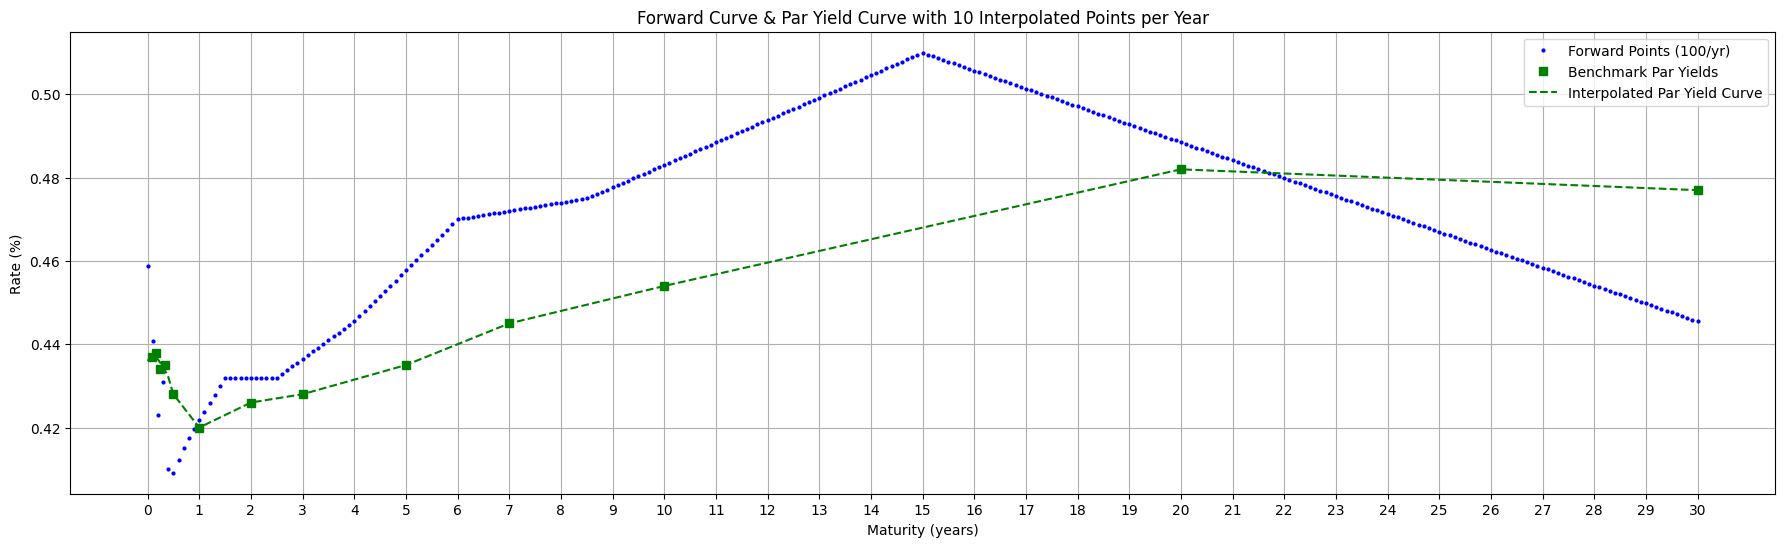

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the benchmark instruments.
# For bills (maturities < 1 year) we use their market price to compute DF = Price / Face Value.
# For par bonds (≥1 year) we assume DF = exp(-yield * T) with continuous compounding.
# All yields are expressed as decimals.
benchmarks = [
    # Bills:
    {"maturity": 0.0833, "yield": 0.0437, "price": 996.37, "type": "bill"},
    {"maturity": 0.1667, "yield": 0.0438, "price": 992.75, "type": "bill"},
    {"maturity": 0.25,   "yield": 0.0434, "price": 989.27, "type": "bill"},
    {"maturity": 0.3333, "yield": 0.0435, "price": 985.71, "type": "bill"},
    {"maturity": 0.5,    "yield": 0.0428, "price": 979.05, "type": "bill"},
    # Par bonds:
    {"maturity": 1.0,    "yield": 0.0420, "price": 1000.00, "type": "par"},
    {"maturity": 2.0,    "yield": 0.0426, "price": 1000.00, "type": "par"},
    {"maturity": 3.0,    "yield": 0.0428, "price": 1000.00, "type": "par"},
    {"maturity": 5.0,    "yield": 0.0435, "price": 1000.00, "type": "par"},
    {"maturity": 7.0,    "yield": 0.0445, "price": 1000.00, "type": "par"},
    {"maturity": 10.0,   "yield": 0.0454, "price": 1000.00, "type": "par"},
    {"maturity": 20.0,   "yield": 0.0482, "price": 1000.00, "type": "par"},
    {"maturity": 30.0,   "yield": 0.0477, "price": 1000.00, "type": "par"}
]

# Compute discount factors for each benchmark.
maturities = []
discount_factors = []
for bm in benchmarks:
    T = bm["maturity"]
    maturities.append(T)
    if bm["type"] == "bill":
        # For a bill, DF = Price / Face Value.
        DF = bm["price"] / 1000.0
    else:
        # For par bonds, assume DF = exp(-yield * T)
        DF = np.exp(-bm["yield"] * T)
    discount_factors.append(DF)

maturities = np.array(maturities)
discount_factors = np.array(discount_factors)

# Compute the discrete forward rates between consecutive benchmark maturities.
# The continuously compounded forward rate between T1 and T2 is:
#    f(T1,T2) = [ln(DF(T1)) - ln(DF(T2))] / (T2 - T1)
forward_rates = []
forward_times = []  # using the midpoint between T1 and T2
for i in range(len(maturities) - 1):
    T1 = maturities[i]
    T2 = maturities[i+1]
    DF1 = discount_factors[i]
    DF2 = discount_factors[i+1]
    fwd = (np.log(DF1) - np.log(DF2)) / (T2 - T1)
    forward_rates.append(fwd)
    forward_times.append((T1 + T2) / 2.0)

forward_rates = np.array(forward_rates)
forward_times = np.array(forward_times)

# --- Build an interpolated forward curve with 100 points per year.
max_T = maturities[-1]
# Create a fine grid from 0 to max_T with 100 points per year.
T_fine = np.linspace(0, max_T, int(max_T * 10) + 1)
# Interpolate the discrete forward rates over T_fine.
# Note: Our forward_rates are defined at forward_times (midpoints of intervals).
fwd_interp = interp1d(forward_times, forward_rates, kind='linear', fill_value="extrapolate")
fwd_fine = fwd_interp(T_fine)

# --- Also, interpolate the par yield curve.
par_yields = np.array([bm["yield"] for bm in benchmarks])
par_yield_interp = interp1d(maturities, par_yields, kind='linear', fill_value="extrapolate")
par_yields_fine = par_yield_interp(T_fine)

# --- Plot the curves.
plt.figure(figsize=(22,6))
# Plot the discrete forward rates (from benchmarks) as orange circles.
#plt.plot(forward_times, forward_rates * 10, 'o',color='orange', label='Discrete Forward Rates')
# Plot the interpolated forward curve as a solid black line.
#plt.plot(T_fine, fwd_fine * 100, '-', color='black', label='Interpolated Forward Curve')
# Plot all the forward points from the fine grid as blue dots.
plt.plot(T_fine, fwd_fine * 10, 'bo', markersize=2, label='Forward Points (100/yr)')
# Plot the benchmark par yields as green squares.
plt.plot(maturities, par_yields * 10, 's', color='green', label='Benchmark Par Yields')
# Plot the interpolated par yield curve as a dashed green line.
plt.plot(T_fine, par_yields_fine * 10, '--', color='green', label='Interpolated Par Yield Curve')
plt.xlabel("Maturity (years)")
plt.ylabel("Rate (%)")
plt.title("Forward Curve & Par Yield Curve with 10 Interpolated Points per Year")
# Set the x-axis ticks every 1 year.
plt.xticks(np.arange(0, maturities[-1] + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


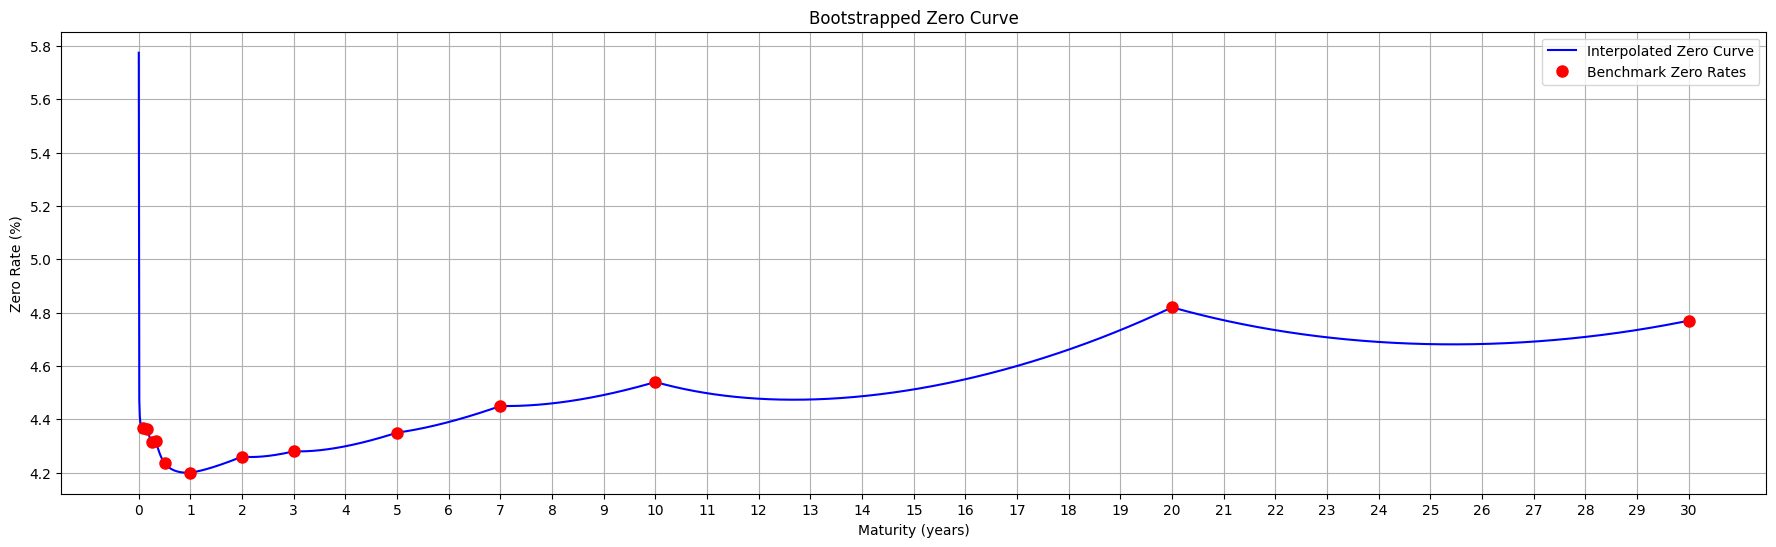

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the benchmark instruments.
# For bills (maturities < 1 year) we use their market price to compute DF = Price / Face Value.
# For par bonds (≥1 year) we assume DF = exp(-yield * T) with continuous compounding.
# All yields are expressed as decimals.
benchmarks = [
    # Bills:
    {"maturity": 0.0833, "yield": 0.0437, "price": 996.37, "type": "bill"},
    {"maturity": 0.1667, "yield": 0.0438, "price": 992.75, "type": "bill"},
    {"maturity": 0.25,   "yield": 0.0434, "price": 989.27, "type": "bill"},
    {"maturity": 0.3333, "yield": 0.0435, "price": 985.71, "type": "bill"},
    {"maturity": 0.5,    "yield": 0.0428, "price": 979.05, "type": "bill"},
    # Par bonds:
    {"maturity": 1.0,    "yield": 0.0420, "price": 1000.00, "type": "par"},
    {"maturity": 2.0,    "yield": 0.0426, "price": 1000.00, "type": "par"},
    {"maturity": 3.0,    "yield": 0.0428, "price": 1000.00, "type": "par"},
    {"maturity": 5.0,    "yield": 0.0435, "price": 1000.00, "type": "par"},
    {"maturity": 7.0,    "yield": 0.0445, "price": 1000.00, "type": "par"},
    {"maturity": 10.0,   "yield": 0.0454, "price": 1000.00, "type": "par"},
    {"maturity": 20.0,   "yield": 0.0482, "price": 1000.00, "type": "par"},
    {"maturity": 30.0,   "yield": 0.0477, "price": 1000.00, "type": "par"}
]

# Compute discount factors and benchmark zero rates.
maturities = []
discount_factors = []
for bm in benchmarks:
    T = bm["maturity"]
    maturities.append(T)
    if bm["type"] == "bill":
        # For a bill, DF = Price / Face Value.
        DF = bm["price"] / 1000.0
    else:
        # For par bonds, assume DF = exp(-yield * T)
        DF = np.exp(-bm["yield"] * T)
    discount_factors.append(DF)

maturities = np.array(maturities)
discount_factors = np.array(discount_factors)

# Compute the benchmark zero rates.
# For each benchmark instrument (with T > 0), zero rate r = -ln(DF)/T.
benchmark_zero_rates = -np.log(discount_factors) / maturities

# --- Interpolate the Zero Curve ---
# Create a fine grid for maturity. We avoid t = 0 to prevent division by zero.
max_T = maturities[-1]
# Use, for example, 100 points per year.
T_fine_zero = np.linspace(0.001, max_T, int(max_T * 100))
# Interpolate discount factors using the benchmark points.
DF_interp = interp1d(maturities, discount_factors, kind='linear', fill_value='extrapolate')
DF_fine = DF_interp(T_fine_zero)
# Compute the interpolated zero rates on the fine grid:
zero_rates_fine = -np.log(DF_fine) / T_fine_zero

# --- Plot the Zero Curve ---
plt.figure(figsize=(22,6))
# Plot the interpolated zero curve as a blue solid line.
plt.plot(T_fine_zero, zero_rates_fine * 100, 'b-', label='Interpolated Zero Curve')
# Plot the benchmark zero rates as red circles.
plt.plot(maturities, benchmark_zero_rates * 100, 'ro', markersize=8, label='Benchmark Zero Rates')
plt.xlabel("Maturity (years)")
plt.ylabel("Zero Rate (%)")
plt.title("Bootstrapped Zero Curve")
plt.xticks(np.arange(0, max_T + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


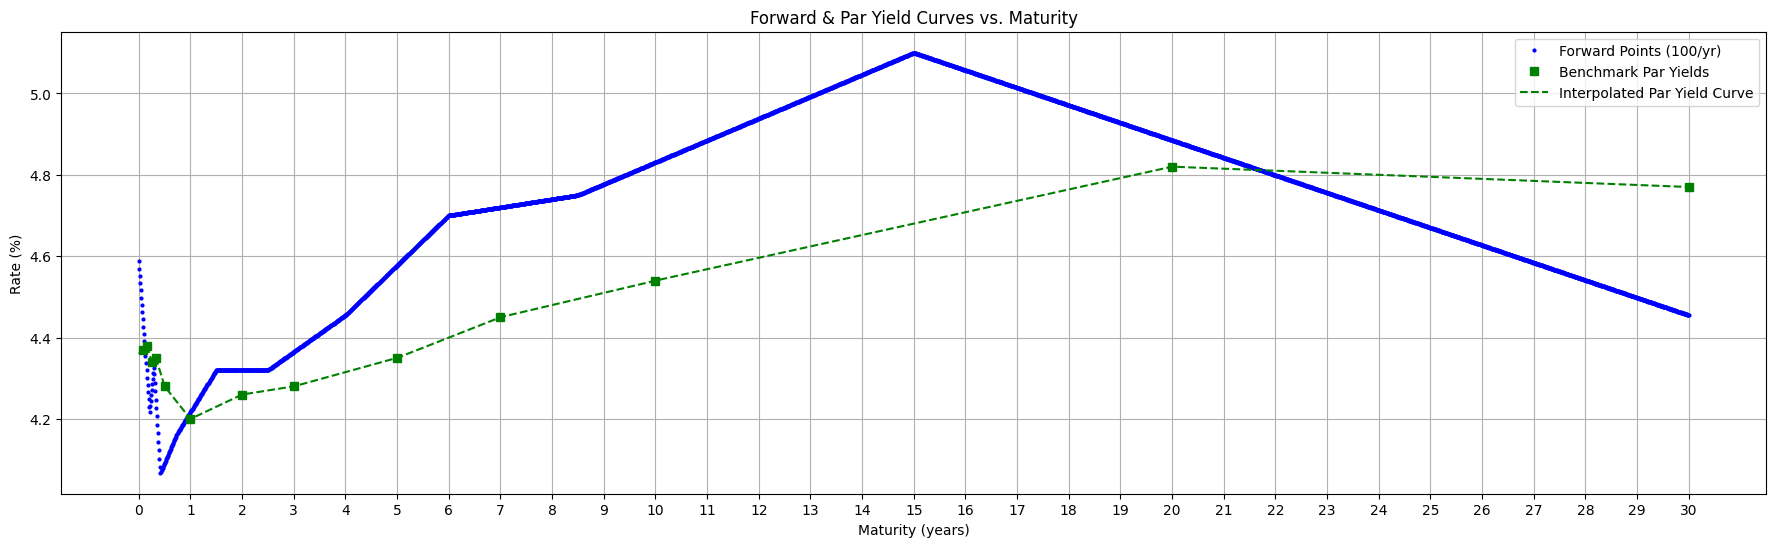

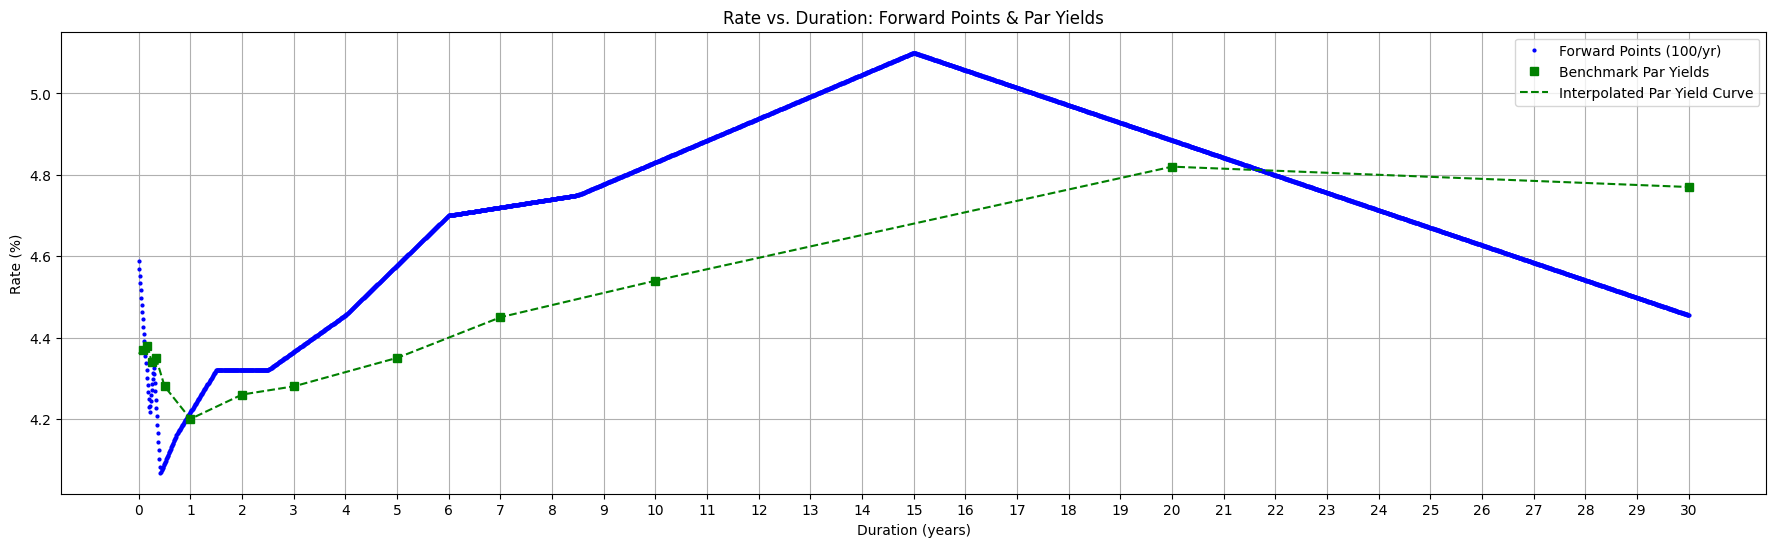

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the benchmark instruments.
# For bills (maturities < 1 year) we use their market price to compute DF = Price / Face Value.
# For par bonds (≥1 year) we assume DF = exp(-yield * T) with continuous compounding.
# All yields are expressed as decimals.
benchmarks = [
    # Bills:
    {"maturity": 0.0833, "yield": 0.0437, "price": 996.37, "type": "bill"},
    {"maturity": 0.1667, "yield": 0.0438, "price": 992.75, "type": "bill"},
    {"maturity": 0.25,   "yield": 0.0434, "price": 989.27, "type": "bill"},
    {"maturity": 0.3333, "yield": 0.0435, "price": 985.71, "type": "bill"},
    {"maturity": 0.5,    "yield": 0.0428, "price": 979.05, "type": "bill"},
    # Par bonds:
    {"maturity": 1.0,    "yield": 0.0420, "price": 1000.00, "type": "par"},
    {"maturity": 2.0,    "yield": 0.0426, "price": 1000.00, "type": "par"},
    {"maturity": 3.0,    "yield": 0.0428, "price": 1000.00, "type": "par"},
    {"maturity": 5.0,    "yield": 0.0435, "price": 1000.00, "type": "par"},
    {"maturity": 7.0,    "yield": 0.0445, "price": 1000.00, "type": "par"},
    {"maturity": 10.0,   "yield": 0.0454, "price": 1000.00, "type": "par"},
    {"maturity": 20.0,   "yield": 0.0482, "price": 1000.00, "type": "par"},
    {"maturity": 30.0,   "yield": 0.0477, "price": 1000.00, "type": "par"}
]

# Compute discount factors for each benchmark.
maturities = []
discount_factors = []
for bm in benchmarks:
    T = bm["maturity"]
    maturities.append(T)
    if bm["type"] == "bill":
        # For a bill, DF = Price / Face Value.
        DF = bm["price"] / 1000.0
    else:
        # For par bonds, assume DF = exp(-yield * T)
        DF = np.exp(-bm["yield"] * T)
    discount_factors.append(DF)

maturities = np.array(maturities)
discount_factors = np.array(discount_factors)

# Compute the discrete forward rates between consecutive benchmark maturities.
# The continuously compounded forward rate between T1 and T2 is:
#    f(T1,T2) = [ln(DF(T1)) - ln(DF(T2))] / (T2 - T1)
forward_rates = []
forward_times = []  # using the midpoint between T1 and T2
for i in range(len(maturities) - 1):
    T1 = maturities[i]
    T2 = maturities[i+1]
    DF1 = discount_factors[i]
    DF2 = discount_factors[i+1]
    fwd = (np.log(DF1) - np.log(DF2)) / (T2 - T1)
    forward_rates.append(fwd)
    forward_times.append((T1 + T2) / 2.0)

forward_rates = np.array(forward_rates)
forward_times = np.array(forward_times)

# --- Build an interpolated forward curve.
# Create a fine grid from 0 to max_T with (here) 10 points per year (adjust scaling as needed).
max_T = maturities[-1]
# (If you really want 100 points per year, use int(max_T * 100) + 1)
T_fine = np.linspace(0, max_T, int(max_T * 100) + 1)
# Interpolate the discrete forward rates over T_fine.
fwd_interp = interp1d(forward_times, forward_rates, kind='linear', fill_value="extrapolate")
fwd_fine = fwd_interp(T_fine)

# --- Also, interpolate the par yield curve.
par_yields = np.array([bm["yield"] for bm in benchmarks])
par_yield_interp = interp1d(maturities, par_yields, kind='linear', fill_value="extrapolate")
par_yields_fine = par_yield_interp(T_fine)

# --- Original Plot: Forward and Par Yield Curves vs. Maturity
plt.figure(figsize=(22,6))
# Plot all the forward points from the fine grid as blue dots.
plt.plot(T_fine, fwd_fine * 100, 'bo', markersize=2, label='Forward Points (100/yr)')
# Plot the benchmark par yields as green squares.
plt.plot(maturities, par_yields * 100, 's', color='green', label='Benchmark Par Yields')
# Plot the interpolated par yield curve as a dashed green line.
plt.plot(T_fine, par_yields_fine * 100, '--', color='green', label='Interpolated Par Yield Curve')
plt.xlabel("Maturity (years)")
plt.ylabel("Rate (%)")
plt.title("Forward & Par Yield Curves vs. Maturity")
plt.xticks(np.arange(0, maturities[-1] + 1, 1))
plt.legend()
plt.grid(True)
plt.show()

# --- Extra Plot: Rate vs. Duration
# Here we assume, as an approximation, that duration is roughly equal to maturity.
# Plot the same curves with the x-axis interpreted as duration.
plt.figure(figsize=(22,6))
# Plot forward points as blue dots.
plt.plot(T_fine, fwd_fine * 100, 'bo', markersize=2, label='Forward Points (100/yr)')
# Plot benchmark par yields as green squares.
plt.plot(maturities, par_yields * 100, 's', color='green', label='Benchmark Par Yields')
# Plot interpolated par yield curve as a dashed green line.
plt.plot(T_fine, par_yields_fine * 100, '--', color='green', label='Interpolated Par Yield Curve')
plt.xlabel("Duration (years)")
plt.ylabel("Rate (%)")
plt.title("Rate vs. Duration: Forward Points & Par Yields")
plt.xticks(np.arange(0, maturities[-1] + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


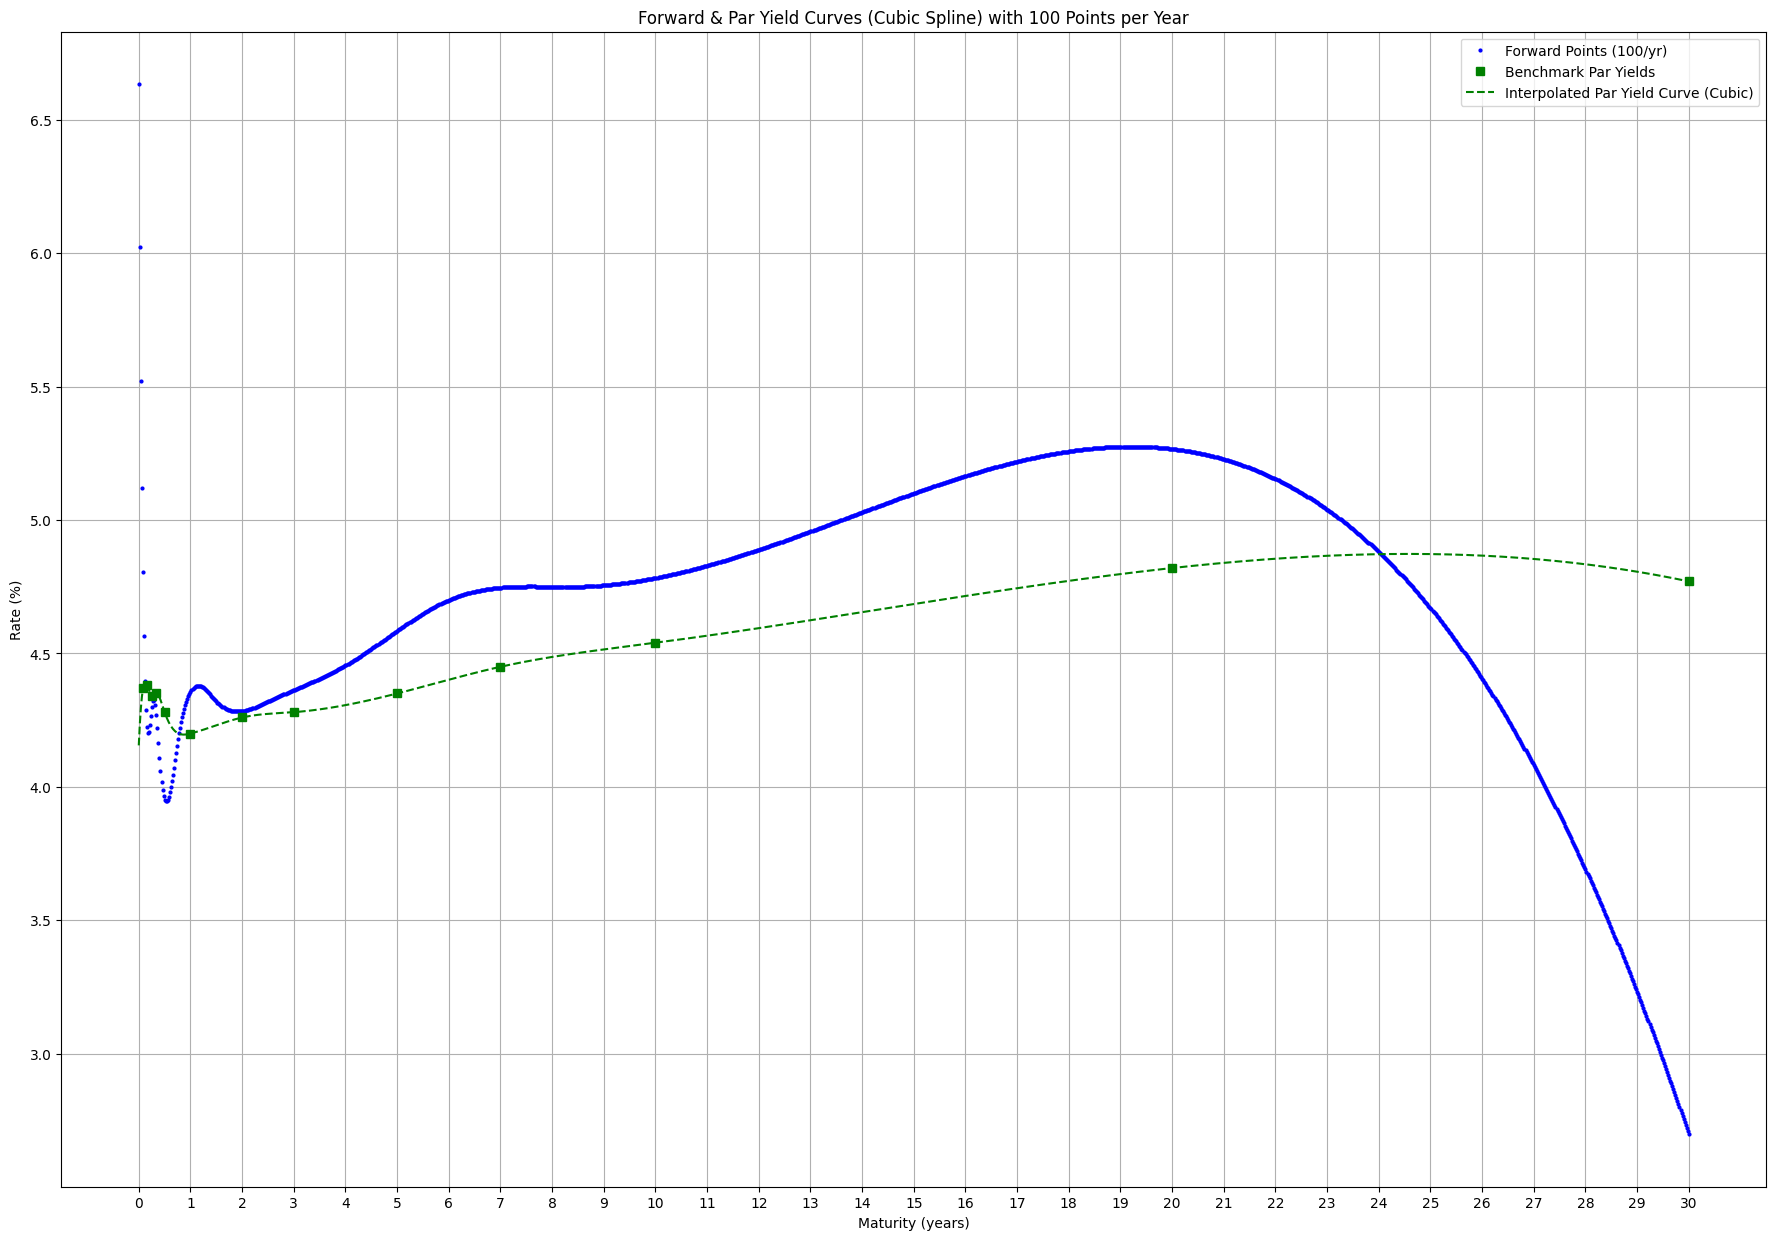

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the benchmark instruments.
# For bills (maturities < 1 year) we use their market price to compute DF = Price / Face Value.
# For par bonds (≥1 year) we assume DF = exp(-yield * T) with continuous compounding.
# All yields are expressed as decimals.
benchmarks = [
    # Bills:
    {"maturity": 0.0833, "yield": 0.0437, "price": 996.37, "type": "bill"},
    {"maturity": 0.1667, "yield": 0.0438, "price": 992.75, "type": "bill"},
    {"maturity": 0.25,   "yield": 0.0434, "price": 989.27, "type": "bill"},
    {"maturity": 0.3333, "yield": 0.0435, "price": 985.71, "type": "bill"},
    {"maturity": 0.5,    "yield": 0.0428, "price": 979.05, "type": "bill"},
    # Par bonds:
    {"maturity": 1.0,    "yield": 0.0420, "price": 1000.00, "type": "par"},
    {"maturity": 2.0,    "yield": 0.0426, "price": 1000.00, "type": "par"},
    {"maturity": 3.0,    "yield": 0.0428, "price": 1000.00, "type": "par"},
    {"maturity": 5.0,    "yield": 0.0435, "price": 1000.00, "type": "par"},
    {"maturity": 7.0,    "yield": 0.0445, "price": 1000.00, "type": "par"},
    {"maturity": 10.0,   "yield": 0.0454, "price": 1000.00, "type": "par"},
    {"maturity": 20.0,   "yield": 0.0482, "price": 1000.00, "type": "par"},
    {"maturity": 30.0,   "yield": 0.0477, "price": 1000.00, "type": "par"}
]

# Compute discount factors for each benchmark.
maturities = []
discount_factors = []
for bm in benchmarks:
    T = bm["maturity"]
    maturities.append(T)
    if bm["type"] == "bill":
        # For a bill, DF = Price / Face Value.
        DF = bm["price"] / 1000.0
    else:
        # For par bonds, assume DF = exp(-yield * T)
        DF = np.exp(-bm["yield"] * T)
    discount_factors.append(DF)

maturities = np.array(maturities)
discount_factors = np.array(discount_factors)

# Compute the discrete forward rates between consecutive benchmark maturities.
# The continuously compounded forward rate between T1 and T2 is given by:
#    f(T1,T2) = [ln(DF(T1)) - ln(DF(T2))] / (T2 - T1)
forward_rates = []
forward_times = []  # using the midpoint between T1 and T2
for i in range(len(maturities) - 1):
    T1 = maturities[i]
    T2 = maturities[i+1]
    DF1 = discount_factors[i]
    DF2 = discount_factors[i+1]
    fwd = (np.log(DF1) - np.log(DF2)) / (T2 - T1)
    forward_rates.append(fwd)
    forward_times.append((T1 + T2) / 2.0)

forward_rates = np.array(forward_rates)
forward_times = np.array(forward_times)

# --- Build an interpolated forward curve with 100 points per year using a cubic spline.
max_T = maturities[-1]
T_fine = np.linspace(0, max_T, int(max_T * 50) + 1)
fwd_interp = interp1d(forward_times, forward_rates, kind='cubic', fill_value="extrapolate")
fwd_fine = fwd_interp(T_fine)

# --- Also, interpolate the par yield curve using a cubic spline.
par_yields = np.array([bm["yield"] for bm in benchmarks])
par_yield_interp = interp1d(maturities, par_yields, kind='cubic', fill_value="extrapolate")
par_yields_fine = par_yield_interp(T_fine)

# --- Plot the curves.
plt.figure(figsize=(22,15))
# Plot the forward points from the fine grid as blue dots.
plt.plot(T_fine, fwd_fine * 100, 'bo', markersize=2, label='Forward Points (100/yr)')
# Plot the benchmark par yields as green squares.
plt.plot(maturities, par_yields * 100, 's', color='green', label='Benchmark Par Yields')
# Plot the interpolated par yield curve as a dashed green line.
plt.plot(T_fine, par_yields_fine * 100, '--', color='green', label='Interpolated Par Yield Curve (Cubic)')
plt.xlabel("Maturity (years)")
plt.ylabel("Rate (%)")
plt.title("Forward & Par Yield Curves (Cubic Spline) with 100 Points per Year")
plt.xticks(np.arange(0, max_T + 1, 1))
plt.legend()
plt.grid(True)
plt.show()


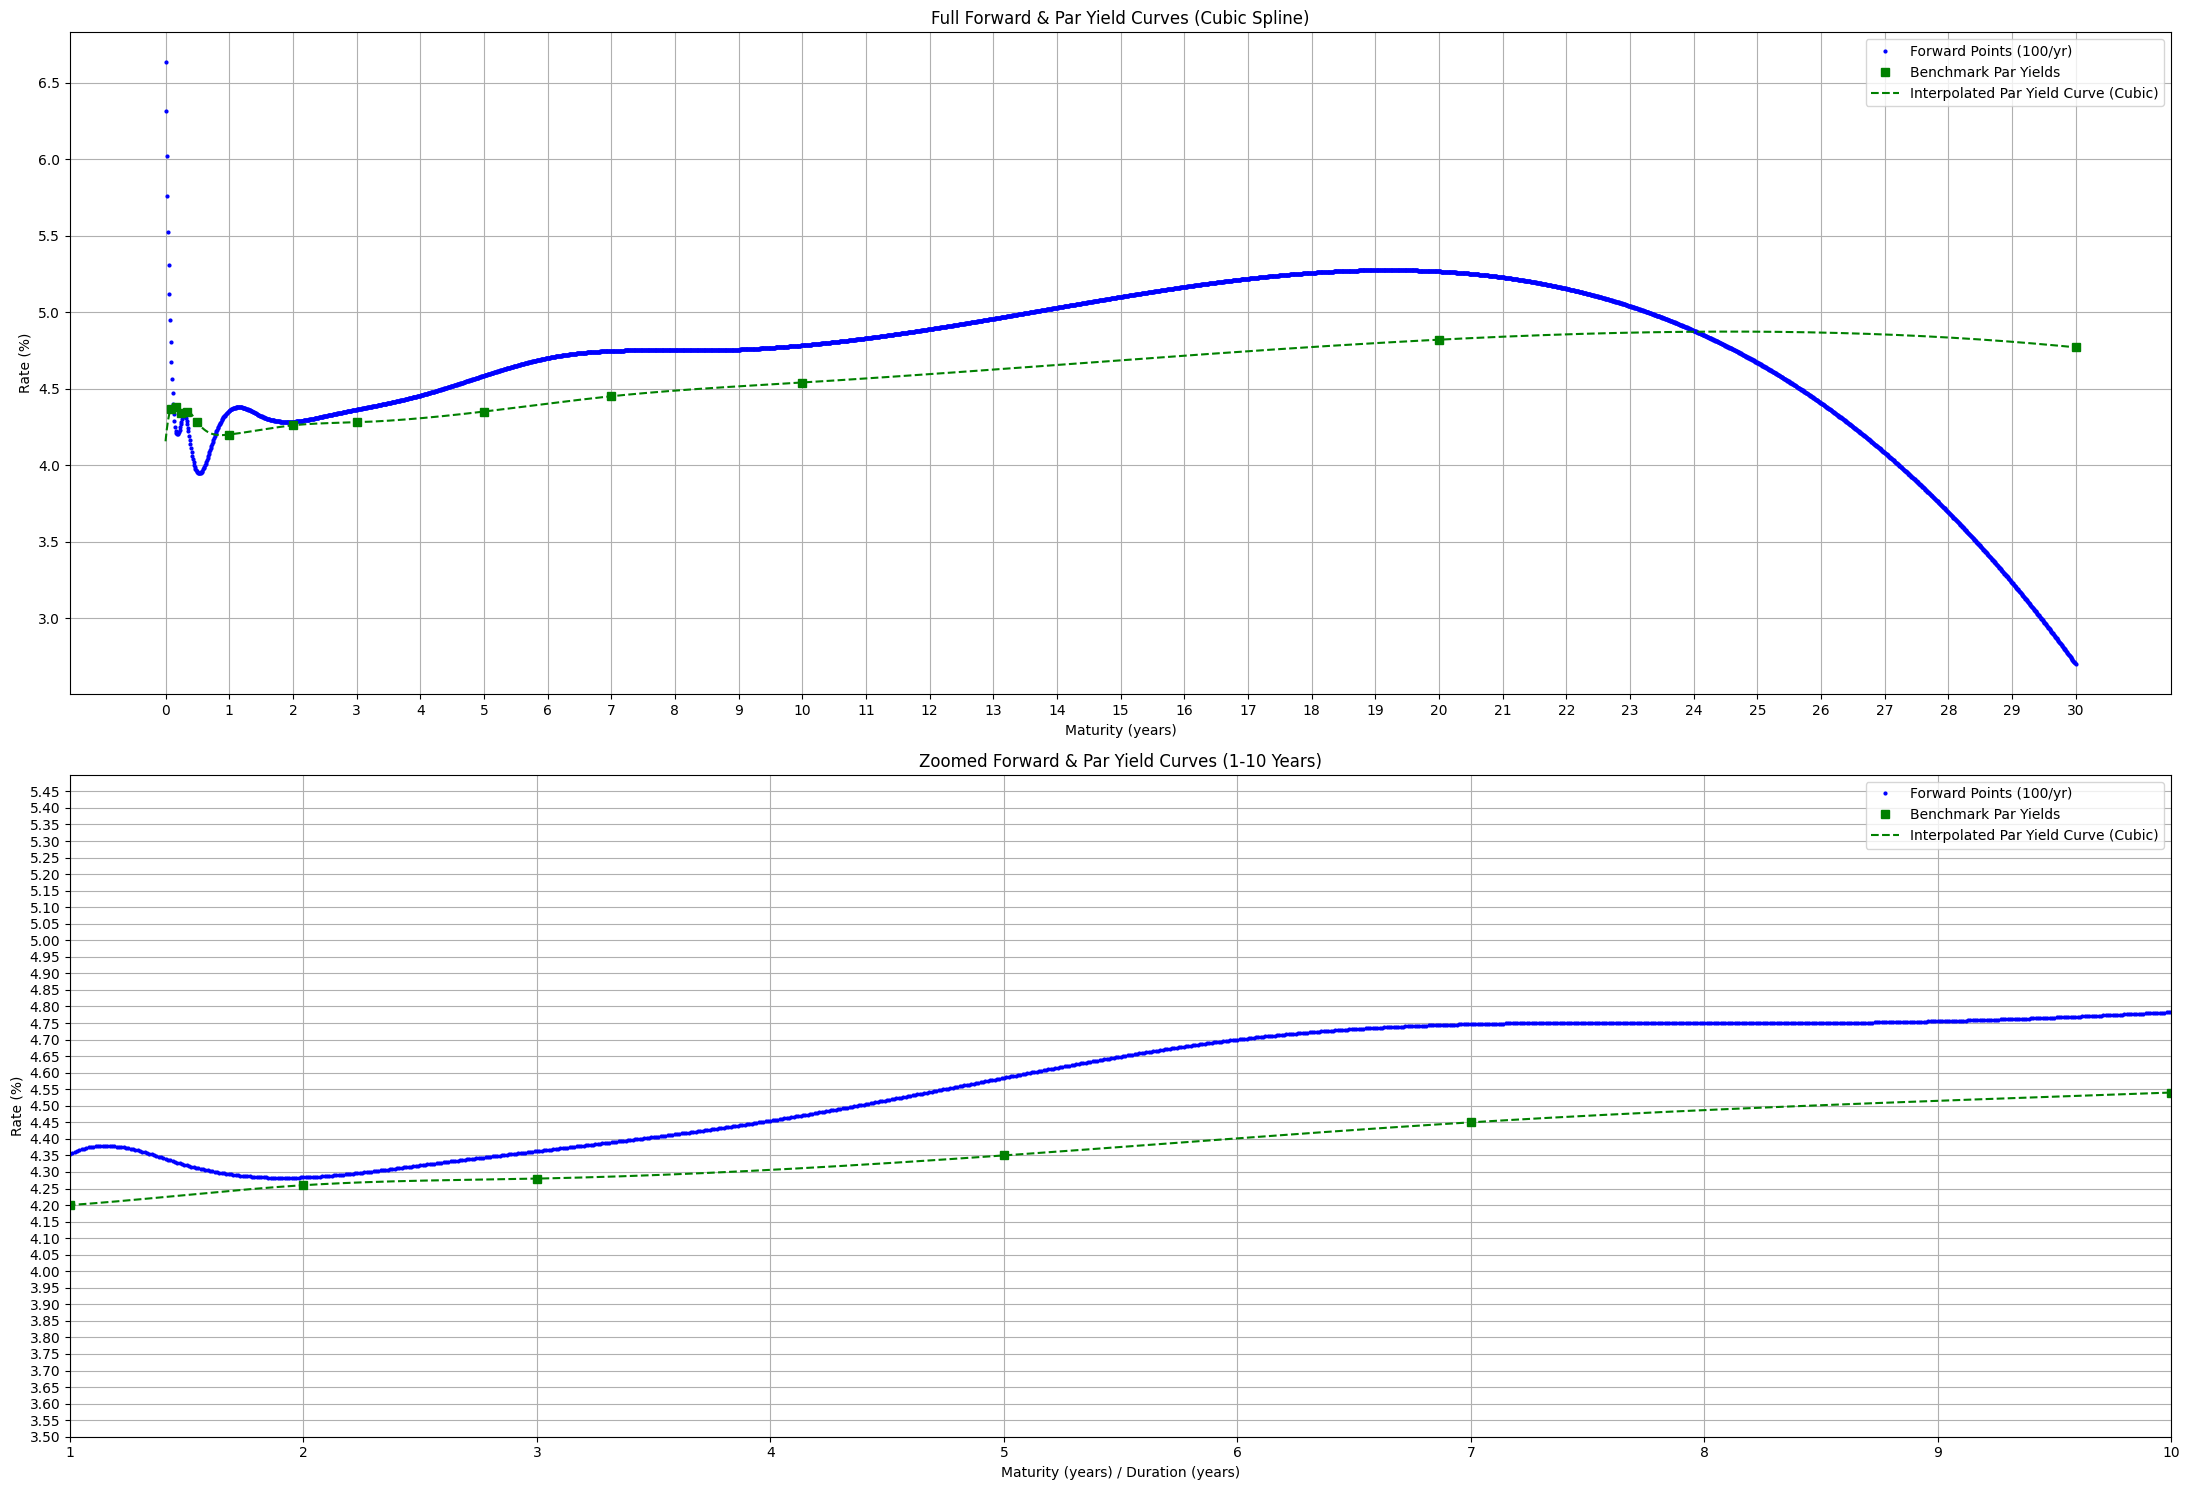

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the benchmark instruments.
# For bills (maturities < 1 year) we use their market price to compute DF = Price / Face Value.
# For par bonds (≥1 year) we assume DF = exp(-yield * T) with continuous compounding.
# All yields are expressed as decimals.
benchmarks = [
    # Bills:
    {"maturity": 0.0833, "yield": 0.0437, "price": 996.37, "type": "bill"},
    {"maturity": 0.1667, "yield": 0.0438, "price": 992.75, "type": "bill"},
    {"maturity": 0.25,   "yield": 0.0434, "price": 989.27, "type": "bill"},
    {"maturity": 0.3333, "yield": 0.0435, "price": 985.71, "type": "bill"},
    {"maturity": 0.5,    "yield": 0.0428, "price": 979.05, "type": "bill"},
    # Par bonds:
    {"maturity": 1.0,    "yield": 0.0420, "price": 1000.00, "type": "par"},
    {"maturity": 2.0,    "yield": 0.0426, "price": 1000.00, "type": "par"},
    {"maturity": 3.0,    "yield": 0.0428, "price": 1000.00, "type": "par"},
    {"maturity": 5.0,    "yield": 0.0435, "price": 1000.00, "type": "par"},
    {"maturity": 7.0,    "yield": 0.0445, "price": 1000.00, "type": "par"},
    {"maturity": 10.0,   "yield": 0.0454, "price": 1000.00, "type": "par"},
    {"maturity": 20.0,   "yield": 0.0482, "price": 1000.00, "type": "par"},
    {"maturity": 30.0,   "yield": 0.0477, "price": 1000.00, "type": "par"}
]

# Compute discount factors for each benchmark.
maturities = []
discount_factors = []
for bm in benchmarks:
    T = bm["maturity"]
    maturities.append(T)
    if bm["type"] == "bill":
        # For a bill, DF = Price / Face Value.
        DF = bm["price"] / 1000.0
    else:
        # For par bonds, assume DF = exp(-yield * T)
        DF = np.exp(-bm["yield"] * T)
    discount_factors.append(DF)

maturities = np.array(maturities)
discount_factors = np.array(discount_factors)

# Compute the discrete forward rates between consecutive benchmark maturities.
# The continuously compounded forward rate between T1 and T2 is:
#    f(T1,T2) = [ln(DF(T1)) - ln(DF(T2))] / (T2 - T1)
forward_rates = []
forward_times = []  # using the midpoint between T1 and T2
for i in range(len(maturities) - 1):
    T1 = maturities[i]
    T2 = maturities[i+1]
    DF1 = discount_factors[i]
    DF2 = discount_factors[i+1]
    fwd = (np.log(DF1) - np.log(DF2)) / (T2 - T1)
    forward_rates.append(fwd)
    forward_times.append((T1 + T2) / 2.0)

forward_rates = np.array(forward_rates)
forward_times = np.array(forward_times)

# --- Build interpolated curves using a cubic spline.
max_T = maturities[-1]
# Create a fine grid from 0 to max_T with 100 points per year.
T_fine = np.linspace(0, max_T, int(max_T * 100) + 1)

# Interpolate the discrete forward rates over T_fine using a cubic spline.
fwd_interp = interp1d(forward_times, forward_rates, kind='cubic', fill_value="extrapolate")
fwd_fine = fwd_interp(T_fine)

# Interpolate the par yield curve using a cubic spline.
par_yields = np.array([bm["yield"] for bm in benchmarks])
par_yield_interp = interp1d(maturities, par_yields, kind='cubic', fill_value="extrapolate")
par_yields_fine = par_yield_interp(T_fine)

# --- Create a figure with two subplots.
plt.figure(figsize=(22,15))

# Subplot 1: Full range plot (0 to max_T years)
plt.subplot(2,1,1)
plt.plot(T_fine, fwd_fine * 100, 'bo', markersize=2, label='Forward Points (100/yr)')
plt.plot(maturities, par_yields * 100, 's', color='green', label='Benchmark Par Yields')
plt.plot(T_fine, par_yields_fine * 100, '--', color='green', label='Interpolated Par Yield Curve (Cubic)')
plt.xlabel("Maturity (years)")
plt.ylabel("Rate (%)")
plt.title("Full Forward & Par Yield Curves (Cubic Spline)")
plt.xticks(np.arange(0, max_T + 1, 1))
plt.legend()
plt.grid(True)

# Subplot 2: Zoomed in from 1 year to 10 years
plt.subplot(2,1,2)
plt.plot(T_fine, fwd_fine * 100, 'bo', markersize=2, label='Forward Points (100/yr)')
plt.plot(maturities, par_yields * 100, 's', color='green', label='Benchmark Par Yields')
plt.plot(T_fine, par_yields_fine * 100, '--', color='green', label='Interpolated Par Yield Curve (Cubic)')
plt.xlabel("Maturity (years) / Duration (years)")
plt.ylabel("Rate (%)")
plt.title("Zoomed Forward & Par Yield Curves (1-10 Years)")
plt.xlim(1, 10)
plt.ylim(3.5, 5.5)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(3.5, 5.5, .05))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
